In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection


file_path = "output/water_simulation_results.npz"

data = np.load(file_path)
nodes = data['nodes']
elements = data['elements']
c1_history = data['c1_history']
c2_history = data['c2_history']
phi_history = data['phi_history']
dt = data['dt'].item()  # Use .item() to get scalar value
num_steps = c1_history.shape[0]
phi_c = data['phi_c'].item()
tau_c = data['tau_c'].item()

In [2]:
phi = pd.DataFrame(phi_history)

In [3]:
phi

,0,1,2,3,4,5,6,7,8,9,...,951,952,953,954,955,956,957,958,959,960
0,0.0,7.407407e-12,1.481481e-11,2.222222e-11,2.962963e-11,3.703704e-11,4.444444e-11,5.185185e-11,5.925926e-11,6.666666e-11,...,1.555556e-10,1.629630e-10,1.703704e-10,1.777778e-10,1.851852e-10,1.925926e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10
1,0.0,5.509907e-12,1.101981e-11,1.652972e-11,2.203963e-11,2.754953e-11,3.305944e-11,3.856935e-11,4.407926e-11,4.958916e-11,...,1.157081e-10,1.212180e-10,1.267279e-10,1.322378e-10,1.377477e-10,1.432576e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10
2,0.0,4.584544e-12,9.169087e-12,1.375363e-11,1.833817e-11,2.292272e-11,2.750726e-11,3.209181e-11,3.667635e-11,4.126089e-11,...,9.627542e-11,1.008600e-10,1.054445e-10,1.100291e-10,1.146136e-10,1.191981e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10
3,0.0,4.133267e-12,8.266534e-12,1.239980e-11,1.653307e-11,2.066634e-11,2.479960e-11,2.893287e-11,3.306614e-11,3.719940e-11,...,8.679861e-11,9.093188e-11,9.506515e-11,9.919842e-11,1.033317e-10,1.074650e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10
4,0.0,3.913191e-12,7.826382e-12,1.173957e-11,1.565276e-11,1.956595e-11,2.347914e-11,2.739234e-11,3.130553e-11,3.521872e-11,...,8.217701e-11,8.609020e-11,9.000340e-11,9.391659e-11,9.782978e-11,1.017430e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10


In [4]:
np.sum(phi_history[0]), np.sum(phi_history[-1])

(np.float64(9.299999701237182e-08), np.float64(5.4979430594708255e-08))

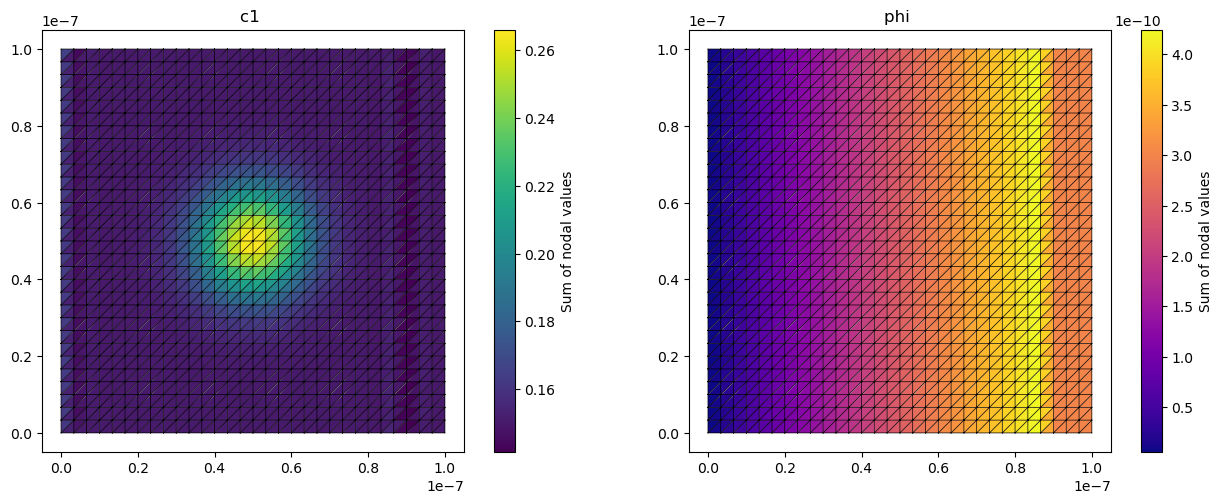

In [5]:
i = 1

# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

                # --- Plot c1 on the first axis (ax1) ---
c1_triangle_values = c1_history[i][elements].sum(axis=1)
collection1 = PolyCollection(nodes[elements], cmap='viridis')
collection1.set_array(c1_triangle_values)
ax1.add_collection(collection1)
ax1.triplot(nodes[:, 0], nodes[:, 1], elements, 'k-', lw=0.5)
ax1.set_title(f"c1 ")
fig.colorbar(collection1, ax=ax1, label="Sum of nodal values")
ax1.autoscale_view()
ax1.set_aspect('equal')

                # --- Plot phi on the second axis (ax2) ---
phi_triangle_values = phi_history[i][elements].sum(axis=1)
collection2 = PolyCollection(nodes[elements], cmap='plasma')
collection2.set_array(phi_triangle_values)
ax2.add_collection(collection2)
ax2.triplot(nodes[:, 0], nodes[:, 1], elements, 'k-', lw=0.5)
ax2.set_title(f"phi ")
fig.colorbar(collection2, ax=ax2, label="Sum of nodal values")
ax2.autoscale_view()
ax2.set_aspect('equal')

                # --- Finalize and show the plot ---
plt.tight_layout()
plt.show()

In [6]:
from utils.fem_mesh import create_structured_mesh, TriangularMesh



nx, ny = 30, 30
Lx, Ly = 1.0e-7, 1.0e-7
nodes, elements = create_structured_mesh(Lx=Lx, Ly=Ly, nx=nx, ny=ny)
mesh = TriangularMesh(nodes, elements)

In [8]:
nodes.shape

(961, 2)